<a href="https://colab.research.google.com/github/akashpatil1996/Cotton-plant-disease-predictor/blob/main/Cotton_Plant_Disease_Predictor_MobileNetv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cotton Plant Disease Predictor 🌿**
---


In [ ]:
# Unzipping the data
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Datasets/Cotton_disease_dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
# Creating efficient net object
mobnet = MobileNetV2(input_shape=[224,224,3], weights='imagenet', include_top=False)

In [ ]:
# Turning trainable = False, to use the existing weights of the Pre-trained MobileNet model 
for layer in mobnet.layers:
  layer.trainable = False

In [ ]:
# Creating flatten layer
flat = Flatten()(mobnet.output)
# Adding output layer
prediction = Dense(units=4, activation='softmax')(flat)
# Adding both to model
model = Model(inputs=mobnet.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                           

In [ ]:
# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Creating a Generator of Data Augmentation




In [ ]:
# Train data Augmentation and Normalizing 
train_datagen = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

# Normalizing validation data
val_datagen = ImageDataGenerator(
    rescale = 1./255
)

In [ ]:
# Defining both directories
train_path = '/content/train'
val_path = '/content/val'

# Dir for train
training_set = train_datagen.flow_from_directory(
    train_path,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical'
)

# Dir for validation
val_set = val_datagen.flow_from_directory(
    val_path,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1951 images belonging to 4 classes.
Found 324 images belonging to 4 classes.


In [ ]:
# Instantiating Callbacks
path = '/content/drive/MyDrive/Colab Notebooks/Checkpoints/cotton_pred_MNv2.h5'

checkpoint = ModelCheckpoint(
    filepath = path,
    monitor = 'val_accuracy',
    mode='max',
    verbose = 1,
    save_best_only = True
)

early_stopping = EarlyStopping(monitor='val_loss', patience = 15)

In [ ]:
# Fitting the model
result = model.fit(
    training_set,
    validation_data = val_set,
    epochs = 100,
    steps_per_epoch = len(training_set),
    validation_steps = len(val_set),
    callbacks=[early_stopping, checkpoint]
)

Epoch 1/100
61/61 [==============================] - ETA: 0s - loss: 1.9726 - accuracy: 0.8006
Epoch 1: val_accuracy improved from -inf to 0.89198, saving model to /content/drive/MyDrive/Colab Notebooks/Checkpoints/cotton_pred_MNv2.h5
61/61 [==============================] - 135s 2s/step - loss: 1.9726 - accuracy: 0.8006 - val_loss: 0.8933 - val_accuracy: 0.8920
Epoch 2/100
61/61 [==============================] - ETA: 0s - loss: 1.0654 - accuracy: 0.8857
Epoch 2: val_accuracy did not improve from 0.89198
61/61 [==============================] - 135s 2s/step - loss: 1.0654 - accuracy: 0.8857 - val_loss: 1.2110 - val_accuracy: 0.8673
Epoch 3/100
61/61 [==============================] - ETA: 0s - loss: 0.9154 - accuracy: 0.8960
Epoch 3: val_accuracy improved from 0.89198 to 0.95062, saving model to /content/drive/MyDrive/Colab Notebooks/Checkpoints/cotton_pred_MNv2.h5
61/61 [==============================] - 130s 2s/step - loss: 0.9154 - accuracy: 0.8960 - val_loss: 0.3275 - val_accuracy

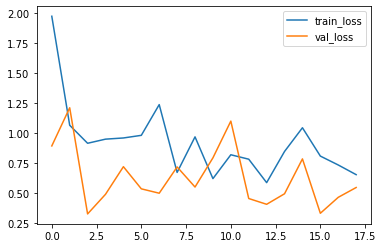

In [ ]:
# Plotting loss
plt.plot(result.history['loss'], label='train_loss')
plt.plot(result.history['val_loss'], label='val_loss')
plt.legend()

In [3]:
import tensorflow as tf
print(tf. __version__)

2.11.0


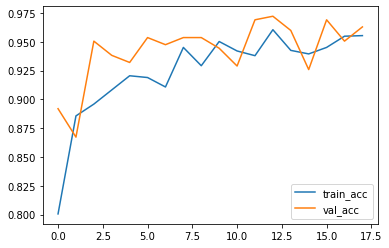

In [ ]:
# Plotting accuracy
plt.plot(result.history['accuracy'], label='train_acc')
plt.plot(result.history['val_accuracy'], label='val_acc')
plt.legend()